In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras 
import tensorflow as tf 
import matplotlib.pyplot as plt


In [5]:
#metriclerimin değişimini görmek istiyorm 
def plotData(history,metric):
  train_metrics = history.history[metric]
  validation_metrics = history.history["val_" + metric]

  epochs = range(1, len(train_metrics)+1)

  plt.plot(epochs, train_metrics)
  plt.plot(epochs, validation_metrics)

  plt.title("Training&Validation"+metric)

  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend(["train_"+metric, "val_"+metric]);

In [7]:
def plotLR(history):  # lr için de aynısını yapıyorum

  learning_rate = history.history["lr"] 

  epochs = range(1, len(learning_rate)+1) # range 0'dan başladığı için 

  plt.plot(epochs, learning_rate)
  plt.plot(epochs, validation_metrics)

  plt.title("learning_rate")

  plt.xlabel("Epochs")
  plt.ylabel("learning_rate") ;

In [8]:
from keras.datasets import mnist

(train_images, train_labels) = mnist.load_data()[0]
(test_images , test_labels) = mnist.load_data()[1]

print("shape of train images", train_images.shape)
print("shape of test images", test_images.shape)


11501568/11490434 [==============================] - 0s 0us/step
shape of train images (60000, 28, 28)
shape of test images (10000, 28, 28)


In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout,Flatten, MaxPooling2D


In [10]:
input_shape = (28,28,1)

In [11]:
def mnist_model(input_shape): #modelimi tanımladım
  model = Sequential([Conv2D(28,kernel_size=(3,3),    input_shape = input_shape),
                      MaxPooling2D(pool_size = (2,2)),
                      Flatten(),
                      Dense(128, activation  = "relu"),
                      Dropout(0.2),
                      Dense(10,activation = "softmax")])



  model.compile(      optimizer = "adam",
                      loss = "sparse_categorical_crossentropy",
                      metrics = "accuracy")   


  return model                                     

In [12]:
model = mnist_model(input_shape) # model oluşturdum
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4732)              0         
                                                                 
 dense (Dense)               (None, 128)               605824    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                        

In [13]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping()
history_early_stopping  =  model.fit(x = train_images,
                                     y = train_labels ,
                                     epochs = 50,
                                     validation_split = 0.20,
                                     batch_size = 64 ,
                                     verbose = 2,
                                     callbacks = [early_stopping])

Epoch 1/50
750/750 - 21s - loss: 1.0105 - accuracy: 0.8380 - val_loss: 0.2843 - val_accuracy: 0.9251 - 21s/epoch - 28ms/step
Epoch 2/50
750/750 - 20s - loss: 0.2978 - accuracy: 0.9204 - val_loss: 0.1844 - val_accuracy: 0.9560 - 20s/epoch - 27ms/step


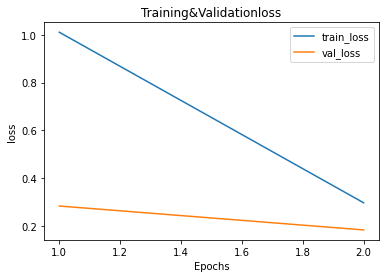

In [14]:
plotData(history_early_stopping, "loss")

In [15]:
model = mnist_model(input_shape) # model oluşturdum
early_stopping_1 = EarlyStopping(monitor = "val_accuracy",
                                 patience = 3  ,       # herhangi gelişme olmasa da model eğitime devam ediyor
                                 min_delta = 0.001,    # 0.001 den aşağısını iyileşme için kabul etme
                                 mode = "auto")        # eğrinn özellğiğine göre takip yapıyor 

early_stopping = EarlyStopping()
history_early_stopping_1  =  model.fit(x = train_images,
                                     y = train_labels ,
                                     epochs = 50,
                                     validation_split = 0.20,
                                     batch_size = 64 ,
                                     verbose = 2,
                                     callbacks = [early_stopping_1]) 



Epoch 1/50
750/750 - 21s - loss: 1.0070 - accuracy: 0.8220 - val_loss: 0.2565 - val_accuracy: 0.9366 - 21s/epoch - 27ms/step
Epoch 2/50
750/750 - 20s - loss: 0.3103 - accuracy: 0.9168 - val_loss: 0.1737 - val_accuracy: 0.9566 - 20s/epoch - 26ms/step
Epoch 3/50
750/750 - 21s - loss: 0.2087 - accuracy: 0.9413 - val_loss: 0.1592 - val_accuracy: 0.9567 - 21s/epoch - 29ms/step
Epoch 4/50
750/750 - 20s - loss: 0.1787 - accuracy: 0.9494 - val_loss: 0.1380 - val_accuracy: 0.9649 - 20s/epoch - 26ms/step
Epoch 5/50
750/750 - 20s - loss: 0.1496 - accuracy: 0.9566 - val_loss: 0.1436 - val_accuracy: 0.9599 - 20s/epoch - 26ms/step
Epoch 6/50
750/750 - 20s - loss: 0.1294 - accuracy: 0.9631 - val_loss: 0.1257 - val_accuracy: 0.9687 - 20s/epoch - 26ms/step
Epoch 7/50
750/750 - 20s - loss: 0.1222 - accuracy: 0.9639 - val_loss: 0.1118 - val_accuracy: 0.9744 - 20s/epoch - 26ms/step
Epoch 8/50
750/750 - 21s - loss: 0.1129 - accuracy: 0.9672 - val_loss: 0.1180 - val_accuracy: 0.9732 - 21s/epoch - 27ms/step


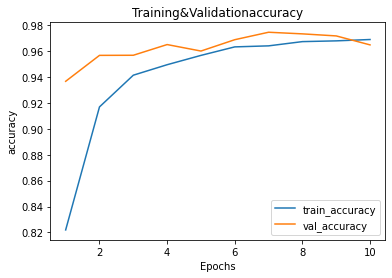

In [17]:
plotData(history_early_stopping_1, "accuracy")